# CASE STUDY :
Problem 
Our global leadership needs to understand how RS sales in India have trended since fiscal year 2016
Company wants to identify potential customer and customers need to pay more attention. 
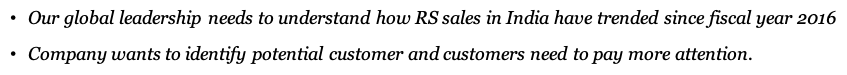

# I. LOADING  & CLEANING  DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fiscalyear
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = db.run_query("SELECT * FROM cleaned_table;")

In [2]:
df = pd.read_excel('data.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'data.xlsx'

In [3]:
df.head()

,Business Line Code,Business Line Description,Discount,Fiscal Date,Fiscal Month Name,Fiscal Period,Fiscal Year,FY 2018 Rev,Item Category,Item Name,Item #,Ship To Customer Name,Ult Dest Country,Units,Revenue
0,RS,Reference Standards,0.00,2015-07-01,JULY,1.0,2016.0,NaN,SYSTEM SUITABILITY,"1,4-Benzoquinone",1056504,Alexandria Real Estate Equities,INDIA,4,731.00
1,RS,Reference Standards,32.25,2015-07-01,JULY,1.0,2016.0,NaN,SYSTEM SUITABILITY,"1,4-Benzoquinone",1056504,Alexandria Real Estate Equities,INDIA,1,182.75
2,RS,Reference Standards,0.00,2015-07-01,JULY,1.0,2016.0,NaN,SYSTEM SUITABILITY,"1,4-Benzoquinone",1056504,Alexandria Real Estate Equities,INDIA,0,0.00
3,RS,Reference Standards,0.00,2015-07-01,JULY,1.0,2016.0,NaN,RESIDUAL SOLVENT,1-Butanol,1081807,Alexandria Real Estate Equities,INDIA,2,365.50
4,RS,Reference Standards,0.00,2015-07-01,JULY,1.0,2016.0,NaN,RESIDUAL SOLVENT,2-Propanol,1570428,Alexandria Real Estate Equities,INDIA,3,548.25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117825 entries, 0 to 117824
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Business Line Code         117825 non-null  object        
 1   Business Line Description  117825 non-null  object        
 2   Discount                   117825 non-null  float64       
 3   Fiscal Date                117825 non-null  datetime64[ns]
 4   Fiscal Month Name          117825 non-null  object        
 5   Fiscal Period              117823 non-null  float64       
 6   Fiscal Year                117823 non-null  float64       
 7   FY 2018 Rev                33616 non-null   float64       
 8   Item Category              117825 non-null  object        
 9   Item Name                  117798 non-null  object        
 10  Item #                     117825 non-null  object        
 11  Ship To Customer Name      117824 non-null  object  

In [5]:
df.shape

(117825, 15)

In [6]:
df.drop(['Item #',
         'FY 2018 Rev',
         'Business Line Description',
         'Ult Dest Country',
         'Business Line Code'],axis=1,inplace=True)


In [7]:
df.head()

,Discount,Fiscal Date,Fiscal Month Name,Fiscal Period,Fiscal Year,Item Category,Item Name,Ship To Customer Name,Units,Revenue
0,0.00,2015-07-01,JULY,1.0,2016.0,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,4,731.00
1,32.25,2015-07-01,JULY,1.0,2016.0,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,1,182.75
2,0.00,2015-07-01,JULY,1.0,2016.0,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,0,0.00
3,0.00,2015-07-01,JULY,1.0,2016.0,RESIDUAL SOLVENT,1-Butanol,Alexandria Real Estate Equities,2,365.50
4,0.00,2015-07-01,JULY,1.0,2016.0,RESIDUAL SOLVENT,2-Propanol,Alexandria Real Estate Equities,3,548.25


#### Assuming negative units and units=0 are either returned or canceled units, we filter data set as following



In [8]:
df=df[df['Units'] > 0]
df.head()

,Discount,Fiscal Date,Fiscal Month Name,Fiscal Period,Fiscal Year,Item Category,Item Name,Ship To Customer Name,Units,Revenue
0,0.00,2015-07-01,JULY,1.0,2016.0,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,4,731.00
1,32.25,2015-07-01,JULY,1.0,2016.0,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,1,182.75
3,0.00,2015-07-01,JULY,1.0,2016.0,RESIDUAL SOLVENT,1-Butanol,Alexandria Real Estate Equities,2,365.50
4,0.00,2015-07-01,JULY,1.0,2016.0,RESIDUAL SOLVENT,2-Propanol,Alexandria Real Estate Equities,3,548.25
5,64.50,2015-07-01,JULY,1.0,2016.0,RESIDUAL SOLVENT,2-Propanol,Alexandria Real Estate Equities,2,365.50


#### Rename Some Columns

In [9]:

df.rename(columns= {'Item Category':'Category',
                    'Ship To Customer Name':'Customer',
                    "Fiscal Month Name":"Fiscal Month"},inplace=True)

#### Check null values 

In [10]:
df.isnull().sum()

Discount          0
Fiscal Date       0
Fiscal Month      0
Fiscal Period     2
Fiscal Year       2
Category          0
Item Name        26
Customer          1
Units             0
Revenue           0
dtype: int64

#### Drop null values since the number of null values is very small compare to the size of dataset

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

Discount         0
Fiscal Date      0
Fiscal Month     0
Fiscal Period    0
Fiscal Year      0
Category         0
Item Name        0
Customer         0
Units            0
Revenue          0
dtype: int64

# II. EDA:

### Overview of company in term of Sales period, Unit Sold in Total, Total Revenue, and Number of Customer

In [12]:
start_period=df['Fiscal Date'].dt.date.min()
end_period=df['Fiscal Date'].dt.date.max()
total_quality=df['Units'].sum()
total_revenue=df['Revenue'].sum()
total_customer = df['Customer'].nunique()
print(f"The Sales Period: {start_period}  to  {end_period}" )
print(f'The Total Units Sold: {total_quality}')
print(f'The Total Revenue: {total_revenue}')
print(f'Total Customer over Period: {total_customer}')

The Sales Period: 2015-07-01  to  2018-03-30
The Total Units Sold: 256676
The Total Revenue: 99182865.47
Total Customer over Period: 319


#### Analyse Customer to see how loyal customer is, how often they do business with USP and Purchase Amount over years.

In [13]:

customer = df.groupby('Customer').agg({'Fiscal Date':    lambda x : (x.max()-x.min()).days,
                                       'Item Name'  :    lambda x : len(x),
                                       'Revenue':        lambda x : sum(x)})
#Create data frame customer with columns:
customer.columns= ['Recency','Frequency','Monetary']
customer.sort_values('Recency', ascending = False)

,Recency,Frequency,Monetary
Customer,,,
Advanced Micro Devices Inc,999,2777,1926639.40
Akamai Technologies Inc,996,501,303306.00
Alliant Energy Corp,984,432,658530.05
Allegion,980,145,234074.00
Coty Inc,978,14,9257.00
...,...,...,...
Fortune Brands Home & Security,0,1,259.25
Fox Corporation (Class B),0,3,954.55
Franklin Resources,0,1,273.00


In [14]:
# Fiscal year 2016
df2016=df[df['Fiscal Year'] == 2016.0]
df2016.head()

,Discount,Fiscal Date,Fiscal Month,Fiscal Period,Fiscal Year,Category,Item Name,Customer,Units,Revenue
0,0.00,2015-07-01,JULY,1.0,2016.0,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,4,731.00
1,32.25,2015-07-01,JULY,1.0,2016.0,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,1,182.75
3,0.00,2015-07-01,JULY,1.0,2016.0,RESIDUAL SOLVENT,1-Butanol,Alexandria Real Estate Equities,2,365.50
4,0.00,2015-07-01,JULY,1.0,2016.0,RESIDUAL SOLVENT,2-Propanol,Alexandria Real Estate Equities,3,548.25
5,64.50,2015-07-01,JULY,1.0,2016.0,RESIDUAL SOLVENT,2-Propanol,Alexandria Real Estate Equities,2,365.50


In [15]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38267 entries, 0 to 40582
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Discount       38267 non-null  float64       
 1   Fiscal Date    38267 non-null  datetime64[ns]
 2   Fiscal Month   38267 non-null  object        
 3   Fiscal Period  38267 non-null  float64       
 4   Fiscal Year    38267 non-null  float64       
 5   Category       38267 non-null  object        
 6   Item Name      38267 non-null  object        
 7   Customer       38267 non-null  object        
 8   Units          38267 non-null  int64         
 9   Revenue        38267 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 3.2+ MB


In [16]:
#Fiscal Year 2017:
df2017=df[df['Fiscal Year']==2017.0]
df2017.head()

,Discount,Fiscal Date,Fiscal Month,Fiscal Period,Fiscal Year,Category,Item Name,Customer,Units,Revenue
40583,0.0,2016-07-01,JULY,1.0,2017.0,EXCIPIENTS,2-tert-Butyl-4-hydroxyanisole,Advanced Micro Devices Inc,1,222.0
40584,0.0,2016-07-01,JULY,1.0,2017.0,EXCIPIENTS,3-tert-Butyl-4-hydroxyanisole,Advanced Micro Devices Inc,1,222.0
40585,0.0,2016-07-01,JULY,1.0,2017.0,EXCIPIENTS,Aspartame,Advanced Micro Devices Inc,1,222.0
40586,0.0,2016-07-01,JULY,1.0,2017.0,IMPURITIES,"Aspartame Related Compound A (5-Benzyl-3,6-di...",Advanced Micro Devices Inc,1,692.0
40587,0.0,2016-07-01,JULY,1.0,2017.0,IMPURITIES,"Atorvastatin Related Compound E (3S, 5S enant...",Advanced Micro Devices Inc,4,2768.0


In [17]:
#Fiscal Year 2018:
df2018=df[df['Fiscal Year']==2018.0]
df2018.head()

,Discount,Fiscal Date,Fiscal Month,Fiscal Period,Fiscal Year,Category,Item Name,Customer,Units,Revenue
84209,0.0,2017-07-03,JULY,1.0,2018.0,SMALL MOLECULES,Abiraterone Acetate,ABIOMED Inc,1,910.0
84210,0.0,2017-07-03,JULY,1.0,2018.0,SMALL MOLECULES,Acetazolamide,ABIOMED Inc,1,230.0
84211,0.0,2017-07-03,JULY,1.0,2018.0,IMPURITIES,"Adrenalone Hydrochloride (3',4'-Dihydroxy-2-(...",ABIOMED Inc,2,1460.0
84212,0.0,2017-07-03,JULY,1.0,2018.0,IMPURITIES,Benzophenone (Diphenylmethanone),ABIOMED Inc,1,730.0
84213,0.0,2017-07-03,JULY,1.0,2018.0,SMALL MOLECULES,Dopamine Hydrochloride,ABIOMED Inc,1,230.0


In [18]:
## Create RFM Distribution plot

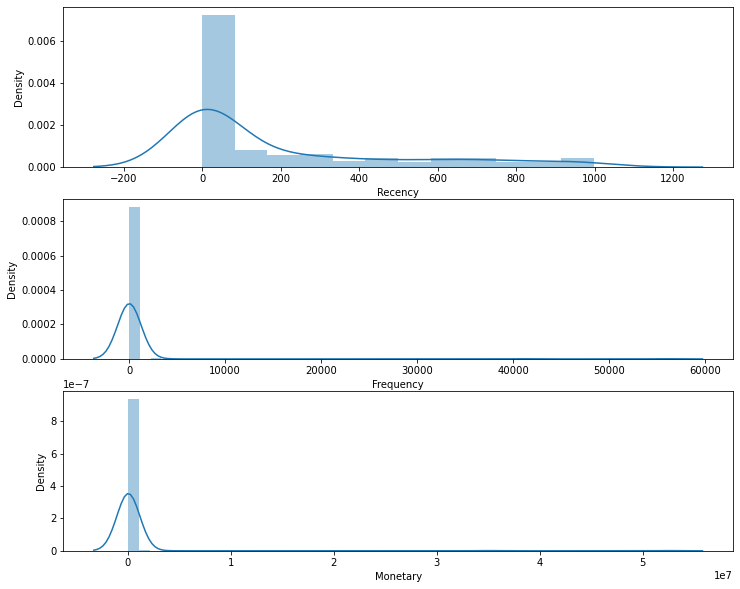

In [19]:

fig, axes= plt.subplots(3,1,figsize=(12,10))

sns.distplot(customer['Recency'],ax=axes[0])

sns.distplot(customer['Frequency'],ax=axes[1])

sns.distplot(customer['Monetary'],ax=axes[2])

plt.show()

In [20]:
print(customer['Frequency'].describe())
print(customer['Recency'].describe())
print(customer['Monetary'].describe())

count      319.000000
mean       342.611285
std       3882.999971
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max      56030.000000
Name: Frequency, dtype: float64
count    319.000000
mean     192.633229
std      291.503660
min        0.000000
25%        0.000000
50%        0.000000
75%      309.000000
max      999.000000
Name: Recency, dtype: float64
count    3.190000e+02
mean     3.109181e+05
std      3.518079e+06
min      1.955000e+02
25%      6.625000e+02
50%      1.597000e+03
75%      7.473000e+03
max      5.248660e+07
Name: Monetary, dtype: float64


In [21]:
# Split the metric into segments as quartiles:
quantiles = customer.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 0.0, 0.5: 0.0, 0.75: 309.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 9.0},
 'Monetary': {0.25: 662.5, 0.5: 1597.0, 0.75: 7473.0}}

# III. Analyse the RFM and Label Top Tier Customer

RFM : The lower recency, highest frequency and monetary amount are our best customer. However, that should be good if in short period of time. In this dataset we look at the aspect of the most recent customer with high frequency and high monetary value

In [22]:
# Create a copy of customer data to perform segment rfm
segmented_rfm=customer
segmented_rfm.head()

,Recency,Frequency,Monetary
Customer,,,
A.O. Smith Corp,661,56030,52486605.0
ABIOMED Inc,942,491,367740.5
AES Corp,786,270,186809.0
AFLAC Inc,945,194,132754.0
AMETEK Inc.,764,55,45102.0


In [23]:
# Assign Recency Score and Frequency & Monetary Score:
def RFMscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1


In [24]:
# Add segment numbers to the rfm table:
segmented_rfm['R']=segmented_rfm['Recency'].apply(RFMscore,args=('Recency',quantiles,))
segmented_rfm['F']=segmented_rfm['Frequency'].apply(RFMscore,args=('Frequency',quantiles,))
segmented_rfm['M']=segmented_rfm['Monetary'].apply(RFMscore,args=('Monetary',quantiles,))
segmented_rfm.head()

,Recency,Frequency,Monetary,R,F,M
Customer,,,,,,
A.O. Smith Corp,661,56030,52486605.0,1,1,1
ABIOMED Inc,942,491,367740.5,1,1,1
AES Corp,786,270,186809.0,1,1,1
AFLAC Inc,945,194,132754.0,1,1,1
AMETEK Inc.,764,55,45102.0,1,1,1


In [25]:
# Create RFM Score column base onf r,f,m quartile:
segmented_rfm['RFMSegment']=(segmented_rfm['R'].map(str) + 
                      segmented_rfm['F'].map(str) +
                      segmented_rfm['M'].map(str))
segmented_rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFMSegment
Customer,,,,,,,
A.O. Smith Corp,661,56030,52486605.0,1,1,1,111
ABIOMED Inc,942,491,367740.5,1,1,1,111
AES Corp,786,270,186809.0,1,1,1,111
AFLAC Inc,945,194,132754.0,1,1,1,111
AMETEK Inc.,764,55,45102.0,1,1,1,111


In [26]:
# Print out top best customer base on RFMScore:
segmented_rfm[segmented_rfm['RFMSegment']=='111'].sort_values('Monetary',ascending= True)

,Recency,Frequency,Monetary,R,F,M,RFMSegment
Customer,,,,,,,
Ameren Corp,607,16,7.488000e+03,1,1,1,111
Fifth Third Bancorp,323,11,8.090000e+03,1,1,1,111
Aptiv PLC,636,26,9.112000e+03,1,1,1,111
Coty Inc,978,14,9.257000e+03,1,1,1,111
CBRE Group,978,21,9.416750e+03,1,1,1,111
Delta Air Lines Inc.,741,13,9.912500e+03,1,1,1,111
Cadence Design Systems,485,14,1.005700e+04,1,1,1,111
AT&T Inc.,673,23,1.089815e+04,1,1,1,111
Brown-Forman Corp.,452,23,1.313300e+04,1,1,1,111


In [27]:
# Label customer base on the sum of R,F,M Score:
segmented_rfm['RFMScore']=segmented_rfm['R'] + segmented_rfm['F'] +segmented_rfm['M']
segmented_rfm['RFMScore'].describe()

count    319.000000
mean       7.877743
std        3.266098
min        3.000000
25%        5.000000
50%        8.000000
75%       11.000000
max       12.000000
Name: RFMScore, dtype: float64

In [28]:
# Base on the score we label customer as : Platinum, Gold, Silver and Bronze
segmented_rfm["Customer_Tier"]=pd.cut(segmented_rfm["RFMScore"],bins=[-1,4,6,9,13],labels=['Platinum','Gold','Silver','Bronze'])
segmented_rfm


,Recency,Frequency,Monetary,R,F,M,RFMSegment,RFMScore,Customer_Tier
Customer,,,,,,,,,
A.O. Smith Corp,661,56030,52486605.0,1,1,1,111,3,Platinum
ABIOMED Inc,942,491,367740.5,1,1,1,111,3,Platinum
AES Corp,786,270,186809.0,1,1,1,111,3,Platinum
AFLAC Inc,945,194,132754.0,1,1,1,111,3,Platinum
AMETEK Inc.,764,55,45102.0,1,1,1,111,3,Platinum
...,...,...,...,...,...,...,...,...,...
Newmont Corporation,0,1,310.0,4,4,4,444,12,Bronze
News Corp. Class A,0,2,2023.0,4,3,2,432,9,Silver
News Corp. Class B,0,1,1595.0,4,4,3,443,11,Bronze


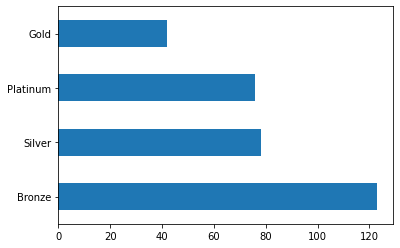

In [29]:
sizes= segmented_rfm['Customer_Tier'].value_counts()
sizes.plot.barh()

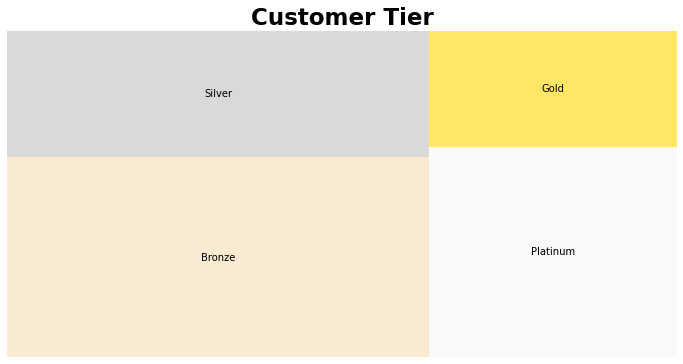

In [30]:
# Plot the Customer tier
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 6)
squarify.plot(label=sizes.index, alpha=.6,sizes=sizes,color=["wheat","silver","whitesmoke", "gold"])
plt.title("Customer Tier",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

# IV. Analysis Customer Lifetime Value

## 1. Formula:


$$ CLTV = \frac{Average Order Value * Purchase Frequency} {Churn Rate} \ * Profit Margin $$

In [31]:
# For Fiscal Year 2017

customer2017 = df2017.groupby('Customer').agg({'Fiscal Date':    lambda x : (x.max()-x.min()).days,

                                               'Item Name'  :    lambda x : len(x),

                                               'Revenue'    :    lambda x : sum(x)})

customer2017.columns= ['Recency','Frequency','Monetary']

customer2017.sort_values('Recency', ascending = False)


,Recency,Frequency,Monetary
Customer,,,
Akamai Technologies Inc,357,123,74506.0
Alliant Energy Corp,354,158,216504.0
Allstate Corp,342,458,263726.0
Advanced Micro Devices Inc,341,1105,766728.4
American Tower Corp.,336,205,241062.0
...,...,...,...
Cummins Inc.,0,11,5805.0
Costco Wholesale Corp.,0,2,444.0
Copart Inc,0,6,2742.0


#### Average Order Value: 

In [32]:
customer2017['AvgOrderValue'] =customer2017['Monetary']/customer2017['Frequency']
customer2017['AvgOrderValue']

Customer
A.O. Smith Corp                 932.447941
ABIOMED Inc                     871.304020
AES Corp                        730.656863
AFLAC Inc                       609.060976
AMETEK Inc.                     490.818182
                                  ...     
Motorola Solutions Inc.         351.050000
Nasdaq Inc.                    1028.000000
National Oilwell Varco Inc.     638.000000
News Corp. Class B             1595.000000
NextEra Energy                  729.000000
Name: AvgOrderValue, Length: 161, dtype: float64

#### Purchase Frequency:

In [33]:
PurchaseFrequency=sum(customer2017['Frequency'])/161
PurchaseFrequency

248.07453416149067

#### Churn Rate: ration between customers who not order against to total of customers

In [34]:
churnrate=sum(customer2017['Recency']==0)/161
churnrate
#AS we can see there is more than 50% customer did not order again in Fiscal year of 2016

0.5590062111801242

#### Assuming the profit magin is 40%

In [35]:
customer2017['ProfitMargin']=customer2017['Monetary'] * 0.4
customer2017.head()

,Recency,Frequency,Monetary,AvgOrderValue,ProfitMargin
Customer,,,,,
A.O. Smith Corp,284,28141,26240017.5,932.447941,10496007.0
ABIOMED Inc,324,199,173389.5,871.304020,69355.8
AES Corp,208,102,74527.0,730.656863,29810.8
AFLAC Inc,316,82,49943.0,609.060976,19977.2
AMETEK Inc.,272,11,5399.0,490.818182,2159.6


#### Caculate Customer Life Time Value:

In [36]:
pd.set_option('display.float_format','{:.0f}'.format)
customer2017['CLTV'] =((customer2017['AvgOrderValue']*PurchaseFrequency)/churnrate)*customer2017['ProfitMargin']
customer2017.sort_values('CLTV',ascending=False).head(10)


,Recency,Frequency,Monetary,AvgOrderValue,ProfitMargin,CLTV
Customer,,,,,,
A.O. Smith Corp,284,28141,26240017,932,10496007,4343244285705
Alexandria Real Estate Equities,220,6792,5848153,861,2339261,893851339336
Alphabet Inc. (Class C),330,518,726273,1402,290509,180757413810
Dish Network,8,3,50064,16688,20026,148303377509
AmerisourceBergen Corp,198,102,260012,2549,104005,117655025991
Advance Auto Parts,334,381,488645,1283,195458,111246789208
Advanced Micro Devices Inc,341,1105,766728,694,306691,94437909415
Alaska Air Group Inc,302,90,217753,2419,87101,93521470529
Broadridge Financial Solutions,269,35,109565,3130,43826,60883442747


#### Create Month_Year column to apply pivot table

In [37]:
df2017['Month_Year'] = pd.to_datetime(df2017['Fiscal Date']).dt.to_period('M')
df2017.head()

,Discount,Fiscal Date,Fiscal Month,Fiscal Period,Fiscal Year,Category,Item Name,Customer,Units,Revenue,Month_Year
40583,0,2016-07-01,JULY,1,2017,EXCIPIENTS,2-tert-Butyl-4-hydroxyanisole,Advanced Micro Devices Inc,1,222,2016-07
40584,0,2016-07-01,JULY,1,2017,EXCIPIENTS,3-tert-Butyl-4-hydroxyanisole,Advanced Micro Devices Inc,1,222,2016-07
40585,0,2016-07-01,JULY,1,2017,EXCIPIENTS,Aspartame,Advanced Micro Devices Inc,1,222,2016-07
40586,0,2016-07-01,JULY,1,2017,IMPURITIES,"Aspartame Related Compound A (5-Benzyl-3,6-di...",Advanced Micro Devices Inc,1,692,2016-07
40587,0,2016-07-01,JULY,1,2017,IMPURITIES,"Atorvastatin Related Compound E (3S, 5S enant...",Advanced Micro Devices Inc,4,2768,2016-07


#### Using pivot table have each months as features to see which one is important.

In [38]:
 data= pd.pivot_table(data=df2017,index  ='Customer',
                                columns='Month_Year',
                                values ='Revenue',
                                aggfunc='sum',
                                fill_value=0).reset_index()
data.head()

Month_Year,Customer,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,A.O. Smith Corp,0,0,988597,2587387,2515259,3529291,2123318,2176443,2974950,2546775,3135233,3662766
1,ABIOMED Inc,2376,13971,12798,26924,24149,6672,11460,13140,34625,8190,18170,915
2,AES Corp,0,0,24905,22647,26018,0,0,0,957,0,0,0
3,AFLAC Inc,1685,0,4410,1285,11882,1211,1650,4480,12440,2920,5530,2450
4,AMETEK Inc.,0,0,222,692,0,0,0,0,0,0,0,4485


#### Sum the revenue by company over months as the target column

In [39]:
data['CLV']=data.iloc[:,2:].sum(axis=1)
data.head()

Month_Year,Customer,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,CLV
0,A.O. Smith Corp,0,0,988597,2587387,2515259,3529291,2123318,2176443,2974950,2546775,3135233,3662766,26240017
1,ABIOMED Inc,2376,13971,12798,26924,24149,6672,11460,13140,34625,8190,18170,915,171014
2,AES Corp,0,0,24905,22647,26018,0,0,0,957,0,0,0,74527
3,AFLAC Inc,1685,0,4410,1285,11882,1211,1650,4480,12440,2920,5530,2450,48258
4,AMETEK Inc.,0,0,222,692,0,0,0,0,0,0,0,4485,5399


In [40]:
data.columns

Index(['Customer',    2016-07,    2016-08,    2016-09,    2016-10,    2016-11,
          2016-12,    2017-01,    2017-02,    2017-03,    2017-04,    2017-05,
          2017-06,      'CLV'],
      dtype='object', name='Month_Year')

## 2. Building Predictive model for CLTV:

#### Split data in to training and test data set:

In [41]:
#Let's pick last 5 month of 2017 over the total sales of fiscal year 2017
from sklearn.model_selection import train_test_split
X=data.iloc[:,-6:-1]
y=data['CLV']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [42]:
X

Month_Year,2017-02,2017-03,2017-04,2017-05,2017-06
0,2176443,2974950,2546775,3135233,3662766
1,13140,34625,8190,18170,915
2,0,957,0,0,0
3,4480,12440,2920,5530,2450
4,0,0,0,0,4485
...,...,...,...,...,...
156,0,0,0,0,0
157,0,0,0,0,0
158,0,0,0,638,0
159,1595,0,0,0,0


In [43]:
y

0     26240017
1       171014
2        74527
3        48258
4         5399
        ...   
156        351
157       1028
158        638
159       1595
160        729
Name: CLV, Length: 161, dtype: float64

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([ 40705.36834739,  32974.59109429,  34553.71248024,  43172.18359904,
        56717.63303461,  32974.59109429,  39616.32750976,  32974.59109429,
        32974.59109429,  32974.59109429,  32974.59109429,  58439.93942637,
        32974.59109429,  33205.72512406, 193773.73502172,  79663.88215846,
        33306.21818048,  32974.59109429,  36763.17932133,  75413.29079837,
        36634.26989746,  32974.59109429,  86969.69566599, 475803.20431381,
        32974.59109429,  86162.53786048, 170824.25181711,  39674.44194398,
        32974.59109429,  32974.59109429,  32974.59109429,  32974.59109429,
        32974.59109429,  35938.0123685 , 210445.28173324,  32974.59109429,
        33667.99318359,  34904.05777756,  32974.59109429,  32974.59109429,
        32974.59109429,  38349.37837136,  34304.44538721,  50166.47207962,
        33759.32784325,  34678.53656373,  33205.72512406,  35208.39357956,
        36451.24472239])

## 3. Evaluate the model:

In [45]:
print("R-Square Score" ,metrics.r2_score(y_test, y_pred))
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Square Error",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R-Square Score 0.8404841635525402
Mean Absolute Error 35260.244917352036
Mean Square Error 1585086947.0724638
Root Mean Square Error 39813.15042887794


In [46]:
#Retrieve Coefficient and Intercept of model
list(zip(X.columns, model.coef_))

[(Period('2017-02', 'M'), 2.2944694690714478),
 (Period('2017-03', 'M'), 2.334171875935503),
 (Period('2017-04', 'M'), 1.0049305641999846),
 (Period('2017-05', 'M'), 1.1397774131550793),
 (Period('2017-06', 'M'), 2.220986478125187)]

# V. Identify The Most Selling Cateogry Over Years:


 ## 1.Create data frame customer in regard of Frequency, Unit Sold and Purchase Amount 

In [47]:
selling = df.groupby('Category').agg({ 'Item Name'  :    lambda x : len(x),
                                       'Units'      :    lambda x : sum(x),
                                       'Revenue'    :    lambda x : sum(x)})

selling.columns= ['Frequency','Unit Sold','Purchase_Amount']
selling.sort_values('Unit Sold', ascending = False)

,Frequency,Unit Sold,Purchase_Amount
Category,,,
SMALL MOLECULES,35587,85106,23382082
IMPURITIES,42753,83596,52460242
CALIBRATORS,3296,24726,5321915
EXCIPIENTS,9744,19887,4037998
ANTIBIOTICS,6038,13468,2995280
SYSTEM SUITABILITY,3827,8750,4712999
BIOTECH,1426,8130,3067397
DIETARY SUPPLEMENTS,3352,6044,1685619
RESIDUAL SOLVENT,1199,3246,643402


In [48]:
selling['Average']=selling['Purchase_Amount']/selling['Unit Sold']
selling

,Frequency,Unit Sold,Purchase_Amount,Average
Category,,,,
ANTIBIOTICS,6038,13468,2995280,222
AUTHENTIC SUBSTANCES,1004,1880,486052,259
BIOTECH,1426,8130,3067397,377
CALIBRATORS,3296,24726,5321915,215
DIETARY SUPPLEMENTS,3352,6044,1685619,279
EXCIPIENTS,9744,19887,4037998,203
FCC,257,537,104756,195
IMPURITIES,42753,83596,52460242,628
MISCELLANEOUS,383,612,126773,207


## 2. Purchase Amount based on Category of RS

Text(0.5, 1.0, 'Purchase Amount based on Category')

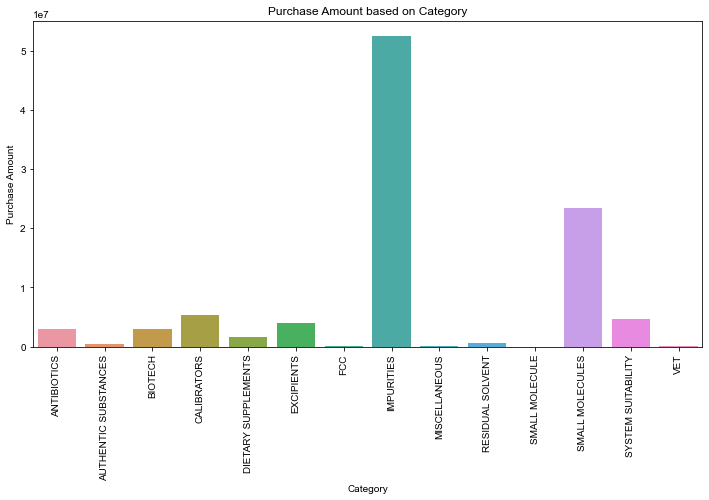

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x=selling.index, y='Purchase_Amount',data=selling)
sns.set(style='darkgrid')
plt.xticks(rotation=90)
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount based on Category')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109293 entries, 0 to 117824
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Discount       109293 non-null  float64       
 1   Fiscal Date    109293 non-null  datetime64[ns]
 2   Fiscal Month   109293 non-null  object        
 3   Fiscal Period  109293 non-null  float64       
 4   Fiscal Year    109293 non-null  float64       
 5   Category       109293 non-null  object        
 6   Item Name      109293 non-null  object        
 7   Customer       109293 non-null  object        
 8   Units          109293 non-null  int64         
 9   Revenue        109293 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 9.2+ MB


## 3. Caculate Revenue over fiscal years

In [51]:
df[['Fiscal Year','Fiscal Period']]=df[['Fiscal Year','Fiscal Period']].astype(str)
df1 = df.groupby('Fiscal Year',as_index=False).agg({'Revenue':'sum'})
df1

,Fiscal Year,Revenue
0,2016.0,33170410
1,2017.0,37006887
2,2018.0,29005569


Text(0, 0.5, 'Revenue in ')

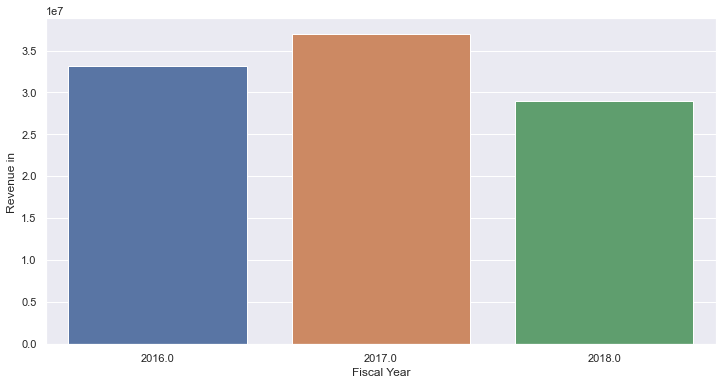

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x='Fiscal Year',y='Revenue',data=df1,ci=True)
plt.ylabel('Revenue in ')

## 4. Revenue over Quaters

In [53]:
# Since each fiscal year starts at the beginning of July, we will arrange the order of Quarter again
df.set_index('Fiscal Date',inplace=True)
fiscalyear.setup_fiscal_calendar(start_month=7)

In [54]:

df['Quarter'] = pd.PeriodIndex(df.index, freq='Q-JUN')
df['Quarter'].dtypes

period[Q-JUN]

In [55]:
df['Quarter'] = df['Quarter'].astype('str')
df.dtypes

Discount         float64
Fiscal Month      object
Fiscal Period     object
Fiscal Year       object
Category          object
Item Name         object
Customer          object
Units              int64
Revenue          float64
Quarter           object
dtype: object

In [56]:
df1=df.groupby('Quarter',as_index=False).Revenue.sum()
df1

,Quarter,Revenue
0,2016Q1,8234317
1,2016Q2,8513814
2,2016Q3,7528853
3,2016Q4,8893425
4,2017Q1,8250157
5,2017Q2,9745477
6,2017Q3,8500790
7,2017Q4,10510462
8,2018Q1,8740006
9,2018Q2,10363870


Text(0.5, 1.0, 'Revenue generated Over Quarters')

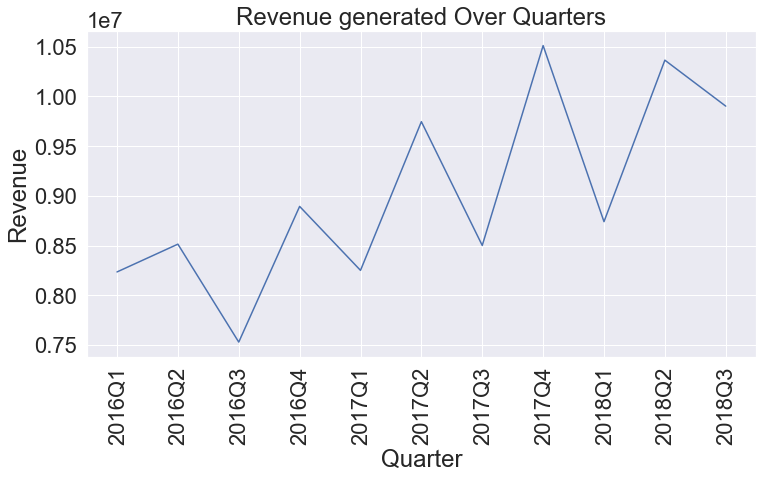

In [57]:
plt.figure(figsize=(12,6))
sns.set(font_scale=2)
sns.lineplot(x='Quarter',y='Revenue',data=df1)
plt.xticks(rotation=90)
plt.title("Revenue generated Over Quarters")

In [58]:
df2=df.groupby('Fiscal Month',as_index=False).Revenue.sum().sort_values('Revenue',ascending=False)
df2

,Fiscal Month,Revenue
2,DECEMBER,11209522
7,MARCH,9799724
9,NOVEMBER,8707006
10,OCTOBER,8706635
3,FEBRUARY,8561244
11,SEPTEMBER,8492564
1,AUGUST,8476890
5,JULY,8255026
4,JANUARY,7570368
6,JUNE,7126184


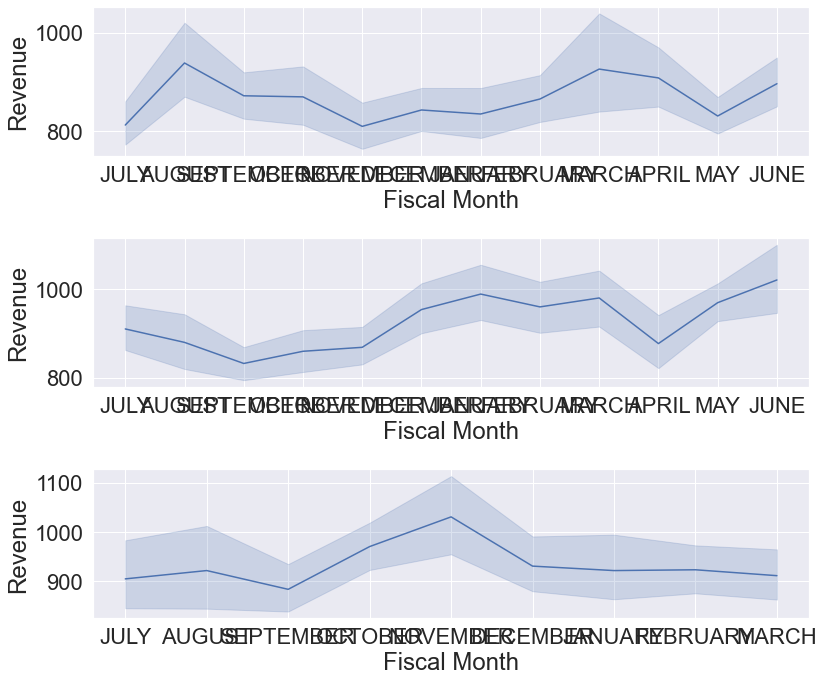

In [59]:
# Now let look at monthly revenue of each year :
fig, axes= plt.subplots(3,1,figsize=(12,10))

sns.lineplot('Fiscal Month','Revenue',data=df2016,ax=axes[0])
sns.lineplot('Fiscal Month','Revenue',data=df2017,ax=axes[1])
sns.lineplot('Fiscal Month','Revenue',data=df2018,ax=axes[2])
plt.tight_layout()

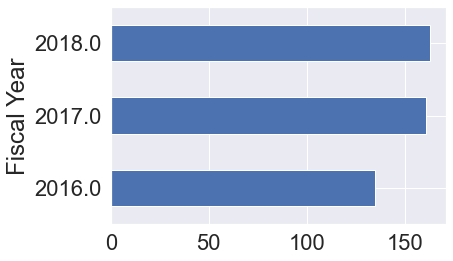

In [60]:
df.groupby('Fiscal Year')['Customer'].nunique().plot.barh()